<a href="https://colab.research.google.com/github/RoCkEtToMaN/Python/blob/master/Sezione14_Progetto_Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Progetto Finale***

Andremo ad implementare una Rete Neurale Artificiale.
Questa sarà una classe con struttura simile alle implementazione dei modelli di SIGHT DEEP LEARNING.

Useremo puramente Numpy e  svilupperemo una Rete Neurale Artificiale, senza utilizzare utilizzare delle classi già fatte tramite Scikit-Learn o Tensorflow, ma sviluppando la nostra classe da zero, utilizzando soltanto Numpy per il Calcolo Scientifico.




*   ***Discriminazione in un set di immagini il numero 0 o 1***



## ***Premsesse***
- In questo tutorial creeremo una Shallow Neural Network, cioè una Rete Neurale con un’unico strato nascosto. Ampliare la Rete Neurale al caso di strati nascosti multipli non è per nulla complesso, a livello matematico non cambia nulla, a livello di codice bisogna lavorare un po’ di più. Prova a farlo come esercizio, oppure se vuoi vedere una mia implementazione fammelo sapere nei commenti.

- La rete che andremo a creare è per problemi di classificazione binaria, quindi quando dobbiamo distinguere un caso positivo da uno negativo (es. distinguere uomo da donna), se vogliamo utilizzarla per altri tipi di problemi, come la classificazione multiclasse o la regressione, dobbiamo soltanto modificare la funzione di attivazione sullo strato di output e la funzione di costo che utilizziamo. Anche qui, se vuoi vedere degli esempi ad-hoc, fammelo sapere.


In [ ]:
import numpy as np
 
class NeuralNetwork:
 
    """
    Questa classe rappresenta una Rete Neurale Artificiale
    Per eseguire l'addestramento utilizzare .fix(X,y)
    Per eseguire delle previsioni usare .predict(X)
    """
 
    def __init__(self, hidden_layer_size = 100):
        
        """
        Args:
             hidden_layer_size(int, optionale): numero di nodi dello strato nascosto
        """
        self.hidden_layer_size = hidden_layer_size
 
# In python non vi è a differenza tra metodi pubblici e privati e quindi per renderli privati "_"
    def _init_weights(self, input_size, hidden_size):
        
        """ 
        Questa inizializza i pesi a valori casuali ed il bias a zero
 
        Args:
            input_size(int): numero di nodi dello strato di input
            hidde_size(int): numero di nodi dello strato nascosto
        """
 
        self._W1 = np.random.randn(input_size, hidden_size)
        self._b1 = np.zeros(hidden_size)
        self._W2 = np.random.randn(hidden_size, 1)
        self._b2 = np.zeros(1)
 
 
 
    def _accuracy(self, y_true, y_pred):    
        """Calcolo dell'accuracy 
        L'accuracy è una funzione di costo che ritorna la % di classificazione
        eseguite correttamente. 

        Args:
            y_true (nparray): valori corretti delle osservazioni/esempi
            y_pred (nparray): le predizioni fornite dalla rete 
        Return:
            (float): valore dell'accuracy
        """
        return np.sum(y_true == y_pred)/len(y_true)
 
 
 
 
    def _log_loss(self, y_true, y_proba):
 
        """Calcolo della Log Loss ( o Cross Entropy)
            
        Questa funzione è una f di costo che tiene in considerazione anche
        della probabilità
 
        Args:
            y_true (ndarray): valori corretti delle osservazioni
            y_proba (ndarray): probabilità di appartenenza
 
        Return:
            (float): valore della Log Loss
        """
        ##"multiply" è un modo piu veloce di fare il prodotto vettoriale
        return -np.sum(np.multiply(y_true, np.log(y_proba)) + np.multiply((1.0001-y_true), np.log(1.00001-y_proba) ))/len(y_true)
 
         
    def _sigmoid(self, Z):
                
        """Calcolo della Sigmoide 
                
        Questa è una funzione di attivazione utilizzata negli strati 
        di output per problemi di classificazione binaria.
 
        Args:
            Z(ndarray): output lineare di uno strato
 
        Returns:
            (ndarray): output post-attivazione dello strato               
                
        """
                 
        return 1/(1 + np.exp(-Z))
 
 
                      
    def _relu(self, Z):   
        """Calcolo della Relù                   
 
        Questa è una funzione di attivazione utilizzata per gli
        strati nascosti.
 
        Args:
            Z(ndarray): output post-attivazione dello strato
                  
        """           
        return np.maximum(Z, 0)
 
 
            
    def _relu_derivative(self, Z):
        """ Derivative Relu

        Derivata della Relu fondamentale alla backpropagataion

        Args:
            Z (ndarray): output lineare di uno strato
        Output:
            dZ(ndarray): derivate parziali rispetto la Z

        """
        dZ = np.zeros(Z.shape) 
        dZ[Z>0]= 1
        return dZ
            
    def _forward_propagation(self, X):
 
        """ Funzione che esegue la Propagazione in Avanti
                
        Args:                   
            X (ndarray): matrice con le features
 
        Returns:
            A2 (ndarray): array con l'output della rete
 
        """
                
        Z1 = np.dot(X, self._W1) + self._b1
        A1 = self._relu(Z1)
        Z2 = np.dot(A1, self._W2) + self._b2
        A2 = self._sigmoid(Z2)
 
        self._forward_cache = (Z1, A1, Z2, A2)
               
        return A2.flatten()   #Per essere sicuri che sia un vettore 
                                      #Usiamo "flatten"
 
 
    def predict(self, X, return_proba=False):
                    
        """ Funzione che esegue la predizione 
                    
        Args:
            X (ndarray): matrice con le features degli esempi
            return_proba (bool, option): se True, questa funziona 
                        ritorna anche la probabilità
 
        Returns:
            y (ndarray): array con le predizioni
            proba (ndrarray, optional): array con le probabilità 
            delle predizioni
                    
        """
 
        proba = self._forward_propagation(X) 
        y = np.zeros(X.shape[0])
        y[proba>=0.5] = 1
        y[proba<0.5] = 0
 
        if (return_proba == True):
            return (y, proba)
                    
 
        return (y)
 
 
 
    def _back_propagation(self, X, y):
                    
        """ Funzione che esegue la Back Propagation 
                    
        Args: 
            X (ndarray): matrice con le features degli esempi
            y (ndarray): vettore con il target degli esempi
 
        Return:
                           
            - tutte le derivate parziali della funzione di costo 
             rispetto ai pesi strato input, bias strato input,
             pesi strato nascosto, bias strato nascosto
                    
         """
 
        (Z1, A1, Z2, A2) = self._forward_cache 
        m = A1.shape[1]
 
        dJ_dz2 = A2 - y.reshape(-1,1)        #reshape per essere sicuri che y ed A2 siano delle stesse dimensioni
        dJ_dW2 = np.dot(A1.T, dJ_dz2)/m
        dJ_db2 = -np.sum(dJ_dz2, axis=0)/m
        dJ_dz1 = np.dot(dJ_dz2,  self._W2.T)* self._relu_derivative(Z1)
        dJ_dW1 = np.dot(X.T, dJ_dz1)/m
        dJ_db1 = np.sum(dJ_dz1 , axis=0)/m
 
 
        return dJ_dz2,  dJ_dW2,  dJ_db2, dJ_dz1, dJ_dW1, dJ_db1
 
 
    def fit (self,  X,  y,  epochs = 200, lr = 0.01):
 
        """ Funzione che esegue il Gradient Descent
 
        Args:                                 
            X (ndarray): matrici con le features degli ingressi
            y(ndarray): matrici con i target degli esempi
                    epoches (int, optional): numero di epoche per il training
            lr (float, optional): learning rate, costante che rappresenta la condizione\velocità di ogni passo 
                                            del Gradient Descent
 
        Output: 
 
        """
                      
        self._init_weights( X.shape[1],  self.hidden_layer_size)      #decido di reinizializzare i pesi ogni qualvolta che faccio partire l'addestramento.
 
        for _ in range(epochs):
                          
            #Calcolo l'output con la Forward Prop Y (A2)
            Y = self._forward_propagation(X)
 
            #Calcolo le Derivate Parziali tramite la BackWard Prop:
 
            dJ_dz2,  dJ_dW2,  dJ_db2, dJ_dz1, dJ_dW1, dJ_db1 = self._back_propagation(X, y)
 
            #Gradient Descent: vediamo come andiamo ad aggiornare i pesi 
            self._W1 -=  lr*dJ_dW1
            self._b1 -= lr*dJ_db1
            self._W2 -= lr*dJ_dW2
            self._b2 -= lr*dJ_db2
                          
                          
    def evaluate(self, X, y):

        """ Funzione di Valutazione del modello 
        Args:                                 
            X (ndarray): matrici con le features degli ingressi
            y(ndarray): matrici con i target degli esempi 
        """
        y_pred,  y_prob = self.predict(X, return_proba=True) 
        accuracy = self._accuracy(y, y_pred)
        log_loss = self._log_loss(y, y_prob) 
                        
        return (accuracy, log_loss)

## ***Testiamo***

### ***Caricare il DataSet***

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow

In [ ]:
img = Image.open("/content/drive/My Drive/mnist/0/1.jpg")

imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/mnist/0/1.jpg'



*   Carichiamo il modulo *OS* ed in particolare la funzione *Listdir*



In [ ]:
from os import listdir


labels = [0,1]

# Array con le info
X = np.array([])     #immagini
y = np.array([])     #label

for label in labels:
    for f in listdir("/content/drive/My Drive/mnist/%d" % label):
        if (".jpg" in f):
            img = Image.open("/content/drive/My Drive/mnist/%d/%s"  % (label , f ))
            tmp = np.array(img)
            tmp = tmp.reshape(1, 28*28)

            if ( X .size == 0):   ## Capire perchè fa il check se è vuoto o no
                X=tmp
            else:
                X = np.concatenate((X, tmp))



            y = np.append(y, label)


    
         

In [ ]:
X.shape
X


In [ ]:
y

2000 come le immagini contenute nelle due cartelle e 784=28*28 colonne

###  ***Creazione  Data Set & Train Set ***


Questa divisione serve per andare a determinare la qualità del modello, si determina un eventuale *overfitting*: condizione che si verifica quando un modello invece di apprendere dei dati, gli memorizza andando poi a sbagliare quando i dati si presentano leggermente diverso.

In [ ]:
def train_test_split(X, y, test_size = 0.3, random_state = None): ##Random State per lo stato del seed del generatore di numeri casuali

    if (random_state != None): ## nel caso non fosse settato a "None", noi ogni volta facciamo si che ogni volta siano diversi per evitare l'overfitting
        np.random.seed(random_state)


    n = X.shape[0]

    test_indicies = np.random.choice(n, int(n*test_size), replace = False)

    X_test = X[test_indicies]
    y_test = y[test_indicies]

    X_train = np.delete(X, test_indicies, axis = 0)
    y_train = np.delete(y, test_indicies, axis = 0)

    return (X_test, y_test, X_train, y_train)   

In [ ]:
X_test, y_test, X_train, y_train = train_test_split(X, y)

In [ ]:
X_test, y_test, X_train, y_train 

(array([[0, 0, 0, ..., 0, 0, 0],
        [2, 4, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.

Possiamo vedere le dimensioni dei due Set:

In [ ]:
X_train.shape

(1400, 784)

In [ ]:
X_test.shape

(600, 784)

### ***Normalizzazione Dati***

Prima di adoperare la rete, bisogna normalizzare i dati che abbiamo.
Questo permette una velocizzazione della fase di addestramento.

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
X_train.min()
X_train.max()

1.0

### ***Addestramento e Valutazione Rete***


In [ ]:
help(NeuralNetwork)

Vediamo che tra i commenti vediamo solamente le *funzioni Pubbliche*

Impongo a 10 il numero dei neuroni contenuti nello strato Hidden Size, dovrebbe essere suff.
Nel caso lo cambiamo.

In [ ]:
model = NeuralNetwork(hidden_layer_size = 10)   #Imposto a 10 dato che di default è di 100

Per l'addestramento, utilizziamo la funzione Fit:


*   #epoche 500




In [ ]:
model.fit(X_train, y_train, epochs = 500)

Valutiamo il modello:

In [ ]:
model.evaluate(X_test, y_test)

(0.9966666666666667, 0.014593042875956386)

### ***Visualizzazione degli Errori della Rete***

Proviamo a plottare le immagini che non hanno avuto una corretta classificazione.





1.   Determiniamo le y_i predette
2.   confrontiamo le predette con quelle oggettive e plottiamo quelle diverse


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1.

Carichiamo il *modulo show* per stampare tutte le immagini dal ciclo for tutte contemporaneamente.


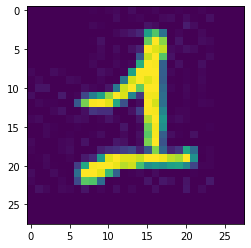

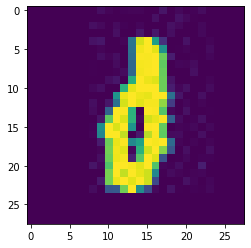

In [ ]:

from matplotlib.pyplot import show
count=0
for i in range(y_test.shape[0]):
    if ( y_pred[i] != y_test[i]):
        imshow(X_test[i].reshape(28,28))
        show()
        #print("ciao and count %s" %count)
        count += 1

  


Vediamo le immagini che sono state classificate in modo errato!

Ovviamente questo risultato può variare a seconda delle inzializzazioni!